In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from alloy_dataset_analysis import *

# Tick parameters
# mpl.rcParams['text.usetex'] = True
# mpl.rcParams['text.latex.preamble'] = [
#     r'\usepackage{amsmath}',
#     r'\usepackage{amssymb}']
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['legend.fontsize'] = 15

In [7]:
### PERFORM K-MEANS CLUSTERING (k = 2) ###

class MPEA_analysis:
    def __init__(self, file_name = "/Users/maitreyeesharma/WORKSPACE/PostDoc/EngChem/MatDisc_ML/python_notebook_bo/curated_MPEA_initial_training_hardness_value.csv",
                fig_folder="/Users/maitreyeesharma/WORKSPACE/PostDoc/EngChem/Space@Hopkins_HEA/analysis/figures/"):
        self.file_name = file_name
        self.fig_folder = fig_folder
     
    def read_dataset(self):
        # Load MPEA dataset
        self.mpea_hardness_full = pd.read_csv(self.file_name)
        self.mpea_hardness = self.mpea_hardness_full.iloc[:,:30] # Only consider element columns
        self.X = np.array(self.mpea_hardness)

        # Elements (colummn labels)
        self.elems = list(self.mpea_hardness.columns)
        return self.elems, self.X
        
    def k_means(self, k):
        # Perform k-means clustering
        kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
        y_predict = kmeans.fit_predict(self.X)
        centroids = kmeans.cluster_centers_

        plt.figure(figsize=(10.4,6))
        plt.rcParams.update({'font.size':12})

        # Plot cluster centers
        for i in range(k):
            plt.plot(self.elems, centroids[i], label = "Cluster " + str(i), marker = 'o')
        plt.xlabel("Element", fontsize=20)
        plt.ylabel("Cluster Center Mole Fraction", fontsize=20)
        plt.title("Hardness Cluster Centers for k = " + str(k), fontsize=22)
        plt.legend()
        plt.show()

        return centroids, y_predict
    
    def cluster_bar_graph(self, centroid0, centroid1, save_plot):
        bar_width = 0.4  # Width of the bars

        # Position of bars on the x-axis
        n = len(self.elems)
        index = np.arange(n)

        # Plotting
        fig, ax = plt.subplots(figsize=(10,5))
        plt.rcParams.update({'font.size': 20})

        bar1 = ax.bar(index, centroid0, bar_width, label='Cluster 0')
        bar2 = ax.bar(index + bar_width, centroid1, bar_width, label='Cluster 1')

        # Labels, title and legend
        # ax.set_title('Hardness Cluster Centroids', fontsize=17)
        ax.set_xlabel('Element')
        ax.set_ylabel('Average Mole Fraction')
        ax.set_xticks(index + bar_width / 2)
        ax.set_xticklabels(self.elems)
        ax.set_ylim([0,0.2])
        legend =  ax.legend(loc='upper left')
        legend.get_frame().set_facecolor('none')    

        ax.tick_params(axis='x', which='major', labelsize=11)

        # Adjust layout
        plt.tight_layout()

        if save_plot:
            plt.savefig(self.fig_folder+
                        'hardness_cluster_centroids.pdf',
                        bbox_inches='tight')    

    def cluster_violin_plot(self, save_plot):
        ### VIOLIN PLOT ###
        self.mpea_hardness_full['Cluster'] = y_predict
        fig = plt.figure(figsize=(5,4.5))
        sns.violinplot(data=self.mpea_hardness_full, x="Cluster", y="Target")
        plt.ylabel('Hardness Value')

        # Adjust layout
        plt.tight_layout()

        if save_plot:
            plt.savefig(self.fig_folder+
                        'hardness_cluster_violin_plot.pdf',
                        bbox_inches='tight')   
    
    """
    Get a list of element counts for the given DataFrame
    """
    def plot_elem_counts(self, save_plot=False, plot_name='kmeans_elem_count.pdf'):
        df = self.mpea_hardness
        elem_counts = [0] * len(self.elems)
        for i in range(len(df)):
            for j in range(len(self.elems)):
                if (df.loc[i, self.elems[j]] > 0.0):
                    elem_counts[j] += 1

        # PBE bar plot
        fig = plt.figure(figsize=(12,4.5))
        pbe_elem_plot = sns.barplot(x=self.elems, y=elem_counts)
        pbe_elem_plot.set(xlabel='Element', ylabel='Number of Occurrences')
        # Adjust layout
        plt.tight_layout()

        if save_plot:
            plt.savefig(self.fig_folder+
                        plot_name,
                        bbox_inches='tight')   
    

/Users/maitreyeesharma/opt/anaconda3/envs/torch/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/maitreyeesharma/opt/anaconda3/envs/torch/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


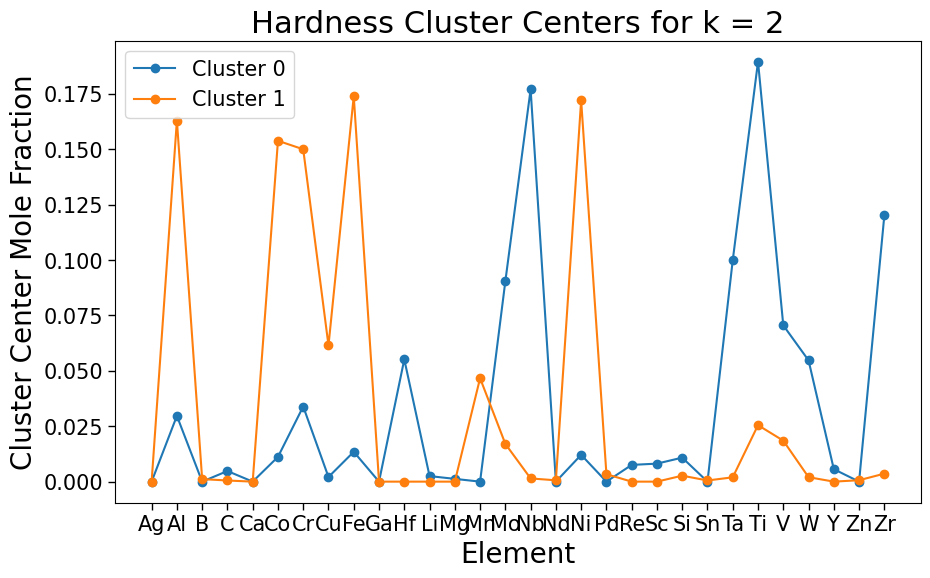

Cluster 0:
15 Nb
24 Ti
29 Zr

Cluster 1:
1 Al
5 Co
6 Cr
8 Fe
17 Ni


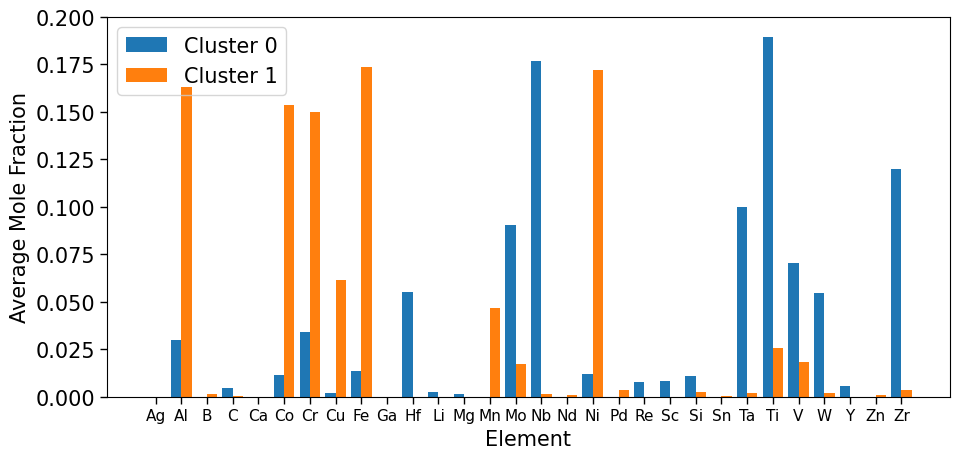

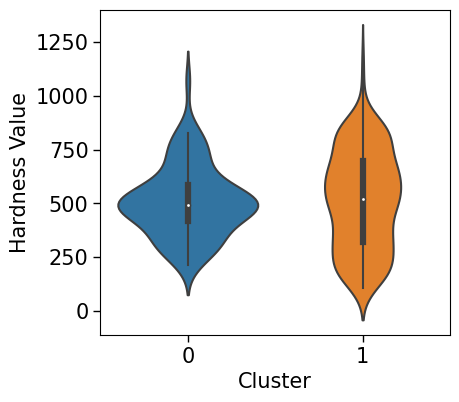

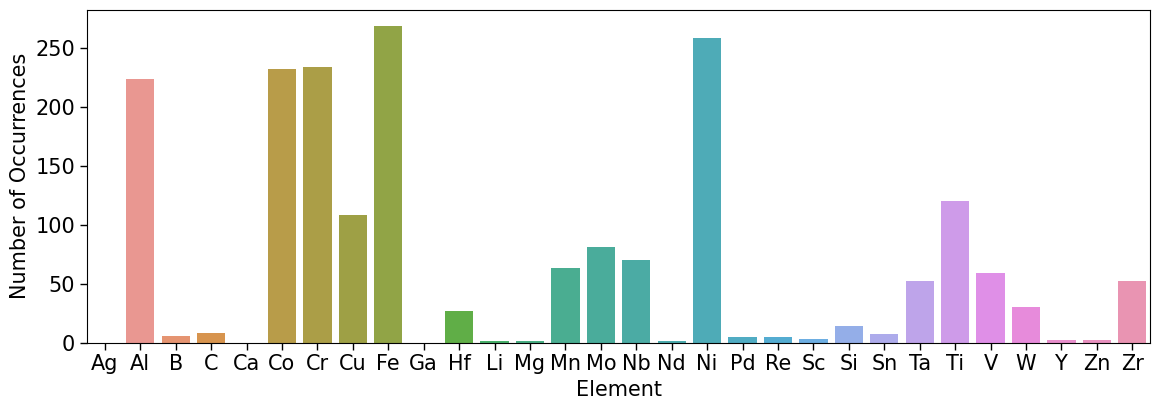

In [9]:
if __name__=="__main__":
    
    run_folder = '/Users/maitreyeesharma/WORKSPACE/PostDoc/EngChem/Space@Hopkins_HEA/analysis/'
    fig_folder = '/Users/maitreyeesharma/WORKSPACE/PostDoc/EngChem/Space@Hopkins_HEA/analysis/figures/'
    # file_name = '/Users/maitreyeesharma/WORKSPACE/PostDoc/EngChem/Space@Hopkins_HEA/dataset/generated_MPEA_test_hardness.csv'
    num_clusters = 2
    
    mpea_analysis = MPEA_analysis()
    elems, X = mpea_analysis.read_dataset()   
    centroids, y_predict = mpea_analysis.k_means(num_clusters)

    # Print significant elements in Cluster 0
    cluster_peaks0 = [15,24,29]
    print("Cluster 0:")
    for i in cluster_peaks0:
        print(i, elems[i])
    print()

    # Print significant elements in Cluster 1
    cluster_peaks1 = [1,5,6,8,17]
    print("Cluster 1:")
    for i in cluster_peaks1:
        print(i, elems[i])

    save_plot = False
    mpea_analysis.cluster_bar_graph(centroids[0], centroids[1], True)
    mpea_analysis.cluster_violin_plot(save_plot)
    mpea_analysis.plot_elem_counts(save_plot=False, plot_name='kmeans_training_elem_count.pdf')
    

In [18]:
### ELEMENT COUNT PLOT ###



NameError: name 'mpea_hardness' is not defined

In [8]:
### GENERATE A HARDNESS DATASET (2 clusters)

# Get number of alloys in each cluster
unique, counts = np.unique(y_predict, return_counts=True)
frac_clust0 = counts[0] / len(y_predict)
frac_clust1 = counts[1] / len(y_predict)

# Generate dataset of 1000 alloys based on clusters 
num_clust0 = int(np.ceil(1000*frac_clust0))
num_clust1 = int(np.ceil(1000*frac_clust1))
gen_alloys = [] # List of generated alloys
for i in range(num_clust0):
    gen_alloys.append(generate_alloy(centroids[0], min_elems=4, min_frac=0.1))
for j in range(num_clust1):
    gen_alloys.append(generate_alloy(centroids[1], min_elems=4, min_frac=0.1))

print(gen_alloys)


### SAVE DATASET TO CSV

df = pd.DataFrame(gen_alloys, columns=elems)
cluster_labels = num_clust0*[0] + num_clust1*[1]
df["Cluster"] = cluster_labels
print(df)
#df.to_csv("gen_MPEA_hardness0.1-0.35(1).csv", index=False)

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.15, 0.0, 0.0, 0.16, 0.0, 0.28, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.31], [0.0, 0.18, 0.0, 0.0, 0.0, 0.0, 0.17, 0.0, 0.17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19], [0.0, 0.21, 0.0, 0.0, 0.0, 0.15, 0.0, 0.0, 0.0, 0.0, 0.22, 0.0, 0.0, 0.0, 0.22, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.18, 0.0, 0.0, 0.0, 0.1, 0.17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.17, 0.19, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.18, 0.0, 0.0, 0.0], [0.0, 0.16, 0.0, 0.0, 0.0, 0.0, 0.16, 0.0, 0.12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.15, 0.0, 0.0, 0.0, 0.0, 0.16], [0.0, 0.18, 0.0, 0.0, 0.0, 0.18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.18, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.18, 0.0, 0.0, 0.18], [0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.16, 0.0, 0.0, 0.0, 0.0, 0